# **Clasificación de imagenes con redes profundas**

*   Raúl Alejandro Pérez Saucedo A01566937
*   Laura Merarí Valdivia Frausto A01641790
*   Francisco Javier Chávez Ochoa A01641644
*   Mayra Sarahí de Luna Castillo A01635774

## Red convolucional con base de datos Fashion-MNIST:

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from os import listdir
from os.path import isfile, join
from skimage import io
from skimage.transform import resize
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import img_as_ubyte

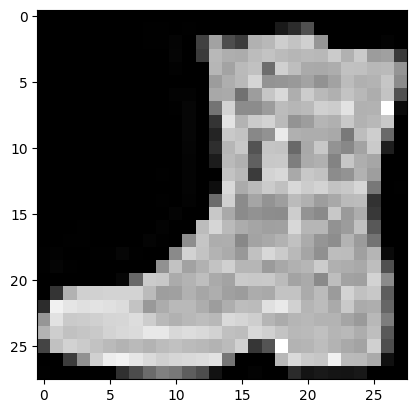

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 151s 318ms/step - loss: 0.5348 - accuracy: 0.8123 - val_loss: 0.3530 - val_accuracy: 0.8697
Epoch 2/10
469/469 [==============================] - 151s 322ms/step - loss: 0.3469 - accuracy: 0.8771 - val_loss: 0.2887 - val_accuracy: 0.8943
Epoch 3/10
469/469 [==============================] - 147s 313ms/step - loss: 0.2997 - accuracy: 0.8925 - val_loss: 0.2763 - val_accuracy: 0.9011
Epoch 4/10
469/469 [==============================] - 147s 314ms/step - loss: 0.2667 - accuracy: 0.9039 - val_loss: 0.2533 - val_accuracy: 0.9091
Epoch 5/10
469/469 [==============================] - 147s 314ms/step - loss: 0.2417 - accuracy: 0.9119 - val_loss: 0.2429 - val_accuracy: 0.9144
Epoch 6/10
469/469 [==============================] - 146s 311ms/step - loss: 0.2209 - accuracy: 0.9190 - val_loss: 0.2326 - val_accuracy: 0.9159
Epoch 7/10
469/469 [==============================]

In [ ]:
# Input image dimensions
img_rows, img_cols = 28, 28

# Number of classes
num_classes = 10

# Load Fashion-MNIST data (the data set is already splitted into training and test sets)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Plot one image
ex = x_train[150, :]
plt.imshow(ex, cmap='gray')
plt.show()

# Reshape data (CNNs expect an image)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices (you don't need this step in 2-class problems)
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)


# Define CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fit model
history=model.fit(x_train, y_train_categorical, validation_data=(x_test, y_test_categorical), epochs=10, batch_size=128)

# Evaluar modelo con test data
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred, target_names=["T-shirt/top",'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']))

In [ ]:
#resumen del modelo
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1179776   
                                                      

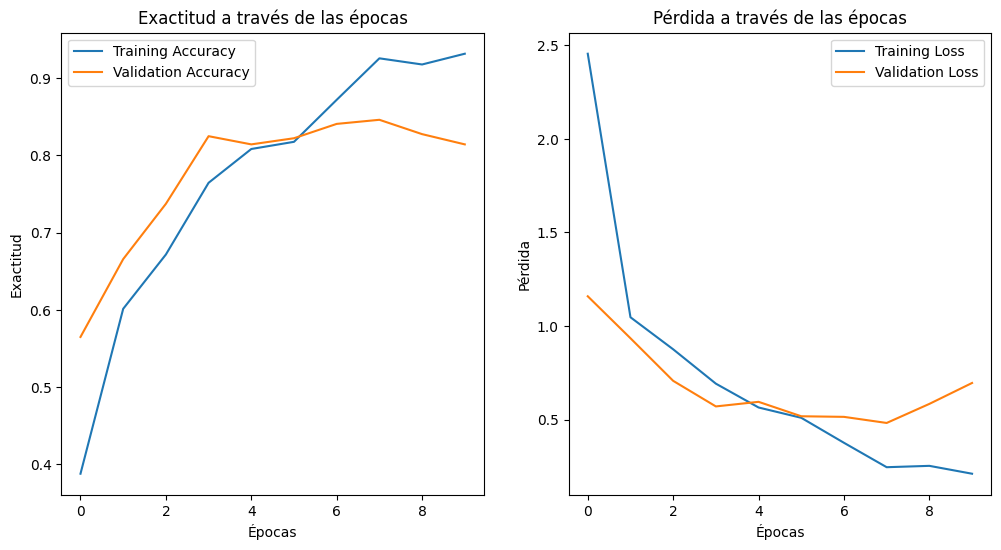

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Exactitud a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Red convolucional con base de datos fotografías satelitales

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#------------------------------------------------------------------------------------------------------------------
#Load image files
#------------------------------------------------------------------------------------------------------------------
scale = 8
img_width = int(1920/scale)
img_height = int(1080/scale)

paths = ['/content/drive/MyDrive/Semestre 5/Redes Neuronales/Biomas/Agua/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Biomas/Bosque/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Biomas/Ciudad/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Biomas/Cultivo/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Biomas/Desierto/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Biomas/Montaña/']

images = []
labels = []
for label, p in enumerate(paths):
    files = [f for f in listdir(p) if isfile(join(p, f))]
    for f in files:
        print("Loading:", p + f)
        labels.append(label)
        rgb = io.imread(p + f)
        rgb_resized = resize(rgb, (img_height, img_width), anti_aliasing=True)
        images.append(rgb_resized)

n_img = len(images)
labels = np.array(labels)

In [9]:
images = np.array(images)

# Codificar etiquetas
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Convertir etiquetas a one-hot encoding
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Definir la arquitectura de la CNN
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width,3))) #3 colores rgb
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

#Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical), batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 133, 238, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 131, 236, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 65, 118, 64)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 65, 118, 64)       0         
                                                                 
 flatten_1 (Flatten)         (None, 490880)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               62832768  
                                                      

In [10]:
# Evaluar modelo con test data
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred, target_names=["Agua",'Bosque','Ciudad','Cultivo','Desierto','Montaña']))

12/12 [==============================] - 14s 1s/step
              precision    recall  f1-score   support

        Agua       0.90      0.79      0.84        66
      Bosque       0.82      0.85      0.83        62
      Ciudad       0.94      0.82      0.88        62
     Cultivo       0.62      0.72      0.67        39
    Desierto       0.81      1.00      0.90        74
     Montaña       0.84      0.73      0.78        74

    accuracy                           0.83       377
   macro avg       0.82      0.82      0.82       377
weighted avg       0.84      0.83      0.83       377



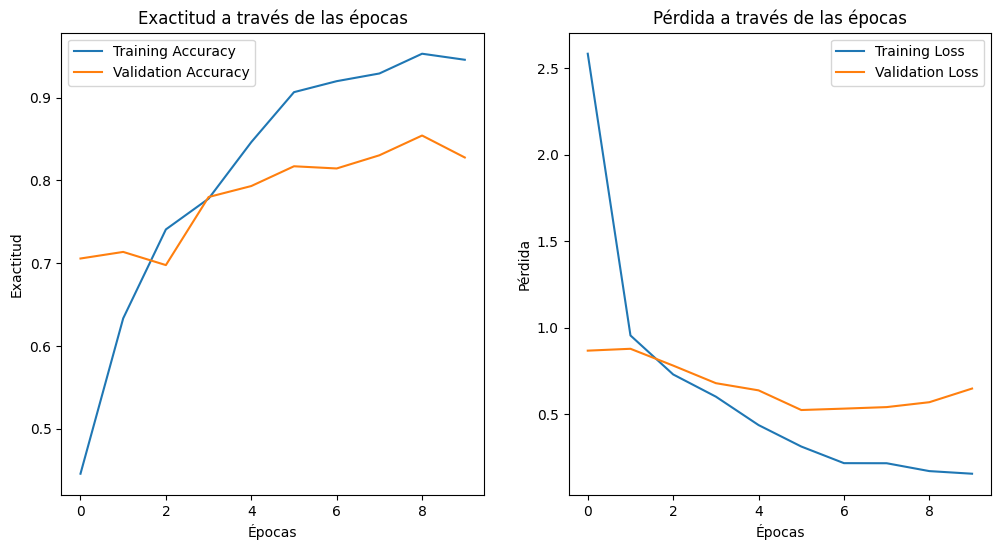

In [11]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Exactitud a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Objetos

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#Load image files
#------------------------------------------------------------------------------------------------------------------
scale = 8
img_width = int(1920/scale)
img_height = int(1080/scale)

paths = ['/content/drive/MyDrive/Semestre 5/Redes Neuronales/Imágenes SP/Celular/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Imágenes SP/Hats/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Imágenes SP/Lapiz/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Imágenes SP/Libro/',
         '/content/drive/MyDrive/Semestre 5/Redes Neuronales/Imágenes SP/Shoes/']

images = []
labels = []
for label, p in enumerate(paths):
    files = [f for f in listdir(p) if isfile(join(p, f))]
    for f in files:
        print("Loading:", p + f)
        labels.append(label)
        rgb = io.imread(p + f)
        rgb_resized = resize(rgb, (img_height, img_width), anti_aliasing=True)
        images.append(rgb_resized)


n_img = len(images)
labels = np.array(labels)

In [5]:
images = np.array(images)

# Codificar etiquetas
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Convertir etiquetas a one-hot encoding
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Definir la arquitectura de la CNN
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width,3))) #3 colores rgb
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

#Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train_categorical, epochs=3, validation_data=(X_test, y_test_categorical), batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 133, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 131, 236, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 65, 118, 64)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 65, 118, 64)       0         
                                                                 
 flatten (Flatten)           (None, 490880)            0         
                                                                 
 dense (Dense)               (None, 128)               62832768  
                                                        

In [6]:
# Evaluar modelo con test data
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred, target_names=['Celular','Cachuchas','Lapiz','Libro','Tenis']))

16/16 [==============================] - 19s 1s/step
              precision    recall  f1-score   support

     Celular       1.00      0.99      0.99       100
   Cachuchas       1.00      1.00      1.00        88
       Lapiz       1.00      1.00      1.00       108
       Libro       1.00      1.00      1.00       111
       Tenis       0.99      1.00      0.99        93

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



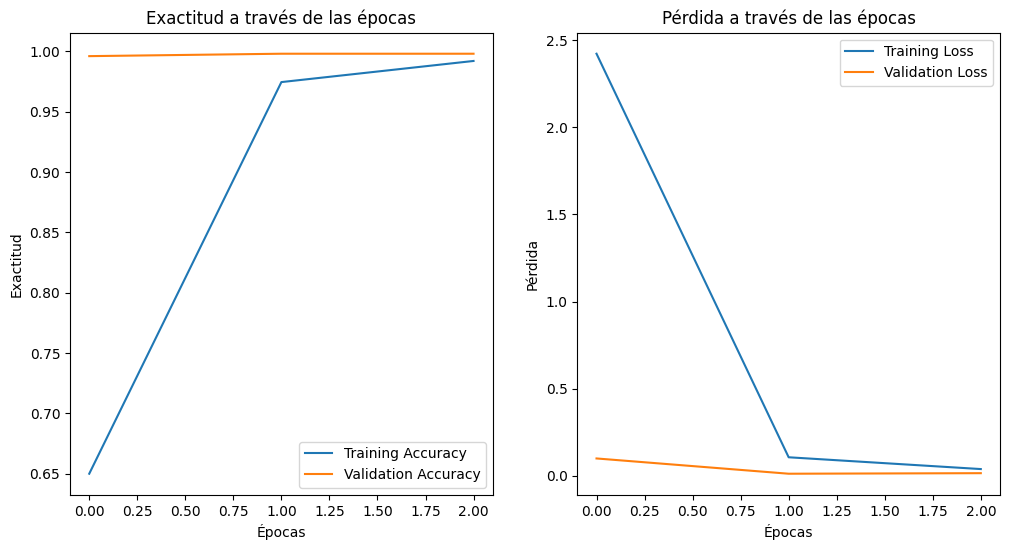

In [7]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Exactitud a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()